<a href="https://colab.research.google.com/github/Swati051090/Learnbay_2/blob/master/ANN_SWATI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Feb  9 12:21:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0              30W /  70W |    107MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/Churn_Modelling.csv')
data.shape

(10000, 14)

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data['Exited'].unique()

array([1, 0])

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
x=data.iloc[:,3:13]
y=data.iloc[:,13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
Geography=pd.get_dummies(x['Geography'],drop_first=True)
Gender=pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
x=x.drop(['Geography','Gender'],axis=1)

In [ ]:

x.shape

(10000, 8)

In [ ]:
x=pd.concat([x,Geography,Gender], axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42 )

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
!pip install keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(units=11, kernel_initializer='he_uniform',input_dim=11))
model.add(Dense(units=8, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=6, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='he_uniform', activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model_history = model.fit(x_train, y_train, validation_split=0.3, batch_size=20, epochs=100)




Epoch 1/100
280/280 [==============================] - 7s 9ms/step - loss: 0.7601 - accuracy: 0.5738 - val_loss: 0.5633 - val_accuracy: 0.7812
Epoch 2/100
280/280 [==============================] - 2s 8ms/step - loss: 0.4965 - accuracy: 0.8004 - val_loss: 0.4635 - val_accuracy: 0.8029
Epoch 3/100
280/280 [==============================] - 3s 10ms/step - loss: 0.4390 - accuracy: 0.8150 - val_loss: 0.4369 - val_accuracy: 0.8125
Epoch 4/100
280/280 [==============================] - 3s 11ms/step - loss: 0.4165 - accuracy: 0.8234 - val_loss: 0.4224 - val_accuracy: 0.8229
Epoch 5/100
280/280 [==============================] - 2s 7ms/step - loss: 0.3980 - accuracy: 0.8357 - val_loss: 0.4087 - val_accuracy: 0.8283
Epoch 6/100
280/280 [==============================] - 2s 7ms/step - loss: 0.3812 - accuracy: 0.8416 - val_loss: 0.3968 - val_accuracy: 0.8363
Epoch 7/100
280/280 [==============================] - 2s 7ms/step - loss: 0.3678 - accuracy: 0.8512 - val_loss: 0.3875 - val_accuracy: 0.84

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 8)                 96        
                                                                 
 dense_7 (Dense)             (None, 6)                 54        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


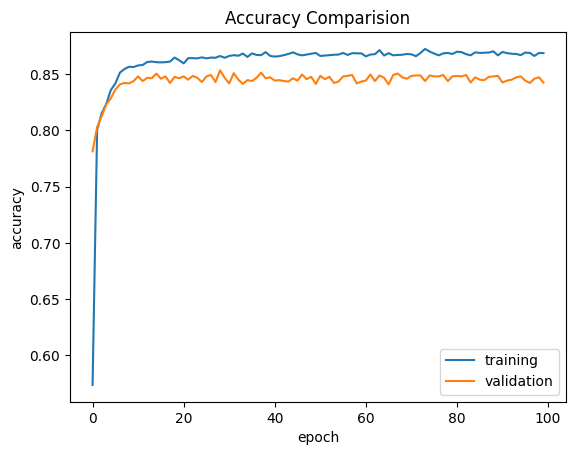

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Accuracy Comparision')
plt.legend(['training','validation'])
plt.show()




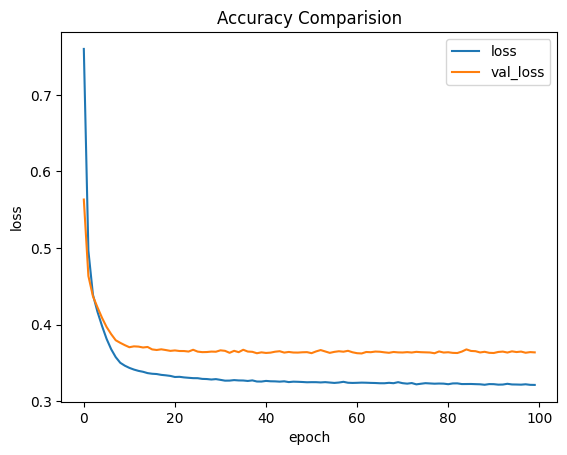

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Accuracy Comparision')
plt.legend(['loss','val_loss'])
plt.show()




In [ ]:
y_pred = model.predict(x_test)
y_pred =(y_pred>0.5)

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

score=accuracy_score(y_pred,y_test)
print(score)

63/63 [==============================] - 0s 1ms/step
[[1530   77]
 [ 197  196]]
0.863
